In [2]:
##HOMEWORK 10: MARIE WOTHE

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

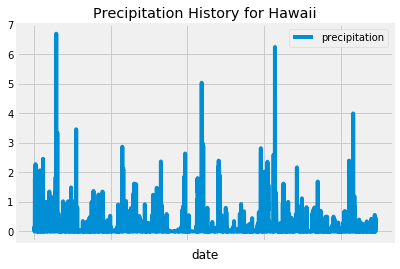

<Figure size 432x288 with 0 Axes>

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
weather = [Measurement.station,\
            Measurement.date,\
            Measurement.prcp]

# Calculate the date 1 year ago from the last data point in the database
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
           
# Perform a query to retrieve the data and precipitation scores

year_weather = session.query(*weather).\
    filter(Measurement.date >= "2016-08-23").\
    order_by(Measurement.date).all()
           
# Save the query results as a Pandas DataFrame and set the index to the date column
weather_df = pd.DataFrame(year_weather, columns=['station', 'date', 'precipitation'])
weather_df = weather_df.fillna(0)
weather_df = weather_df.set_index ('date')

# Sort the dataframe by date ##Note from Marie: already done in query

# Use Pandas Plotting with Matplotlib to plot the data
weather_df.plot(legend=True)
plt.title("Precipitation History for Hawaii")
plt.show()
plt.tight_layout()

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
weather_df.describe() ##the numbers are off (why do i have nearly a hundred more data points?)

,precipitation
count,2230.000000
mean,0.160664
std,0.442067
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


In [13]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [25]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                    group_by(Measurement.station).\
                    order_by(func.count(Measurement.station).desc())
#take count of measurement
for row in active_stations:
    print(row)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [32]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                    filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

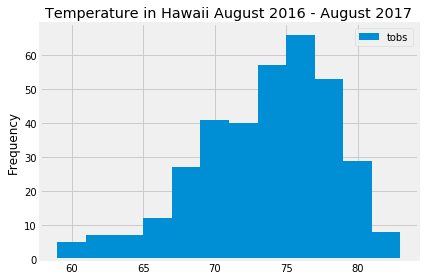

In [40]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram 
results = session.query(Measurement.date, Measurement.tobs).\
            filter(Measurement.date>= "2016-08-23").\
            filter(Measurement.station == 'USC00519281').statement

temp_df = pd.read_sql_query(results, session.bind)

temp_df.plot(kind="hist", bins=12, legend = True)
plt.title('Temperature in Hawaii August 2016 - August 2017')
plt.tight_layout()

In [ ]:
# Design a Flask API based on the queries that you have just developed
###Put Flask API on different file - please see app.py in repository. Thank you! 

## Optional Challenge Assignment